**Python (Semester 2 2024)**
# 9 Astronomical Data Sources Sample Project
*N. Hernitschek*

This notebook contains a project as a complete example of analyzing astronomical data with Python as part of **Python (Semester 2 2024)**. 

---
## Contents
* [Project Overview](#first-bullet)
* [Query](#second-bullet)
* [Cone Search](#third-bullet)
* [Getting GD-1 Data](#fourth-bullet)
* [Tables and Plots](#fifth-bullet)
* [Improving the Plots](#sixth-bullet)
* [Summary](#seventh-bullet)


## 1. Project Overview <a class="anchor" id="first-bullet"></a>


GD-1 is a stellar stream around the Milky Way: it is a collection of stars that we believe was once part of a dwarf galaxy or globular cluster, but the gravitational influence of the Milky Way has torn it apart and spread it over an arc that traces out its orbit on the sky. 
Studying GD-1, or stellar streams in general, helps us to understand its orbits with such a precision that we can use it to measure the mass of the Milky Way.

For studying GD-1, we will use a coordinate system aligned with the stream, which makes fitting the stellar locations much easier as it becomes linear instead of a complicated curve.

In this project, we will repeat parts of the analysis from the paper A. M. Price-Whelan & A. Bonaca (2018), ApJL 863 L20, "Off the Beaten Path: Gaia Reveals GD-1 Stars outside of the Main Stream".

The project covers the following topics that summarize what we have learnt so far in this course:


* Incremental creation of complex ADQL and SQL queries.
* Using Astroquery to query a remote server in Python.
* Transforming coordinates between common coordinate systems using Astropy units and coordinates.
* Working with common astronomical file formats, including FITS, HDF5, and CSV.
* Managing your data with Pandas DataFrames and Astropy Tables.
* Writing functions to make your work less error-prone and more reproducible.
* Creating a reproducible workflow that brings the computation to the data.
* Customising all elements of a plot and creating complex, multi-panel, publication-quality graphics.


This project is based on https://datacarpentry.org/astronomy-python/




## 2. Query <a class="anchor" id="second-bullet"></a>

In this section we will:

* Compose a basic query in ADQL/SQL.
* Use queries to explore a database and its tables.
* Use queries to download data.
* Develop, test, and debug queries incrementally.

        
        

The steps for selecting and downloading data from the Gaia Database are the following:

* make a connection to the Gaia server
* explore information about the database, such as the tables provided
* write a query
* send the query to the server
* download the query result from the server.

    



We can connect to the Gaia database like this:

In [10]:
from astroquery.gaia import Gaia

     
After connecting, we can use `Gaia.load_tables to get the names of the tables in the Gaia database. With the option `only_names=True`, it loads information about the tables, called *metadata*, but not the data itself.

In [11]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


We print the names of the tables with the following `for` loop:

In [12]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_varia

From those tables, we will use mostly `gaiadr2.gaia_source`, which contains Gaia data from data release 2,


We can use `load_table` to get the metadata for that table:



In [13]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')
table_metadata

Retrieving table 'gaiadr2.gaia_source'


In [14]:
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


We then use a `for`loop to print the names of the columns in the table:


In [15]:
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

We now continue with writing queries. First, we run this sample of an ADQL query:

In [16]:
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""

In [17]:
job1 = Gaia.launch_job(query1)
job1

In [18]:
results1 = job1.get_results()
type(results1)


astropy.table.table.Table

In [19]:
print(results1)

     source_id              ra                dec               parallax      
                           deg                deg                 mas         
------------------- ------------------ ------------------ --------------------
4464195329654279808 243.36304525767025 13.332207539188948  0.16439076081079823
4464157602662621312    245.76072515952 15.362547713561668  -0.2110296432373516
4464174164056625024 246.29390759706718  15.47257793268518   0.4746433256414075
4464158186777864192 246.11665685784646   15.1492979577105  0.29595400139231925
4464194092703698048 243.32130865040432 13.330617936122106   0.9563165300756201
4464185571489765376  246.0771571149933 15.475361948153898   0.3581981880000272
4464057757557728512  246.0506722084623  14.64822560418678   0.2130643096328948
4464152311262771968 245.87683702199857 15.255548579139372 -0.40638837982933834
4464241268624812672 243.88258608658998 13.903782305036847 -0.19420855523180477
4464064419051281024 246.39883051914418  14.806978764

We can also run asynchronous queries:

In [20]:
query2 = """SELECT 
TOP 2000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""

In [21]:
job2 = Gaia.launch_job_async(query2)
job2

INFO: Query finished. [astroquery.utils.tap.core]


In [22]:
results2 = job2.get_results()
results2

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
4464195329654279808,243.36304525767025,13.332207539188948,-1.9836654839798653,-3.441298033102305,0.16439076081079823
4464157602662621312,245.76072515952,15.362547713561668,6.479901956928507,2.4402691076146428,-0.2110296432373516
4464174164056625024,246.29390759706718,15.47257793268518,4.866522777608916,-15.68232420624172,0.4746433256414075
4464158186777864192,246.11665685784646,15.1492979577105,-8.436758190824952,0.15197524558621486,0.29595400139231925
4464194092703698048,243.32130865040432,13.330617936122106,1.7000647673456717,-5.321352978282461,0.9563165300756201
4464185571489765376,246.0771571149933,15.475361948153898,-5.726885024117942,-5.336187466029946,0.3581981880000272
4464057757557728512,246.0506722084623,14.64822560418678,3.0113895465081773,0.4941345509804351,0.2130643096328948
4464152311262771968,245.87683702199857,15.255548579139372,-2.6858663354910846,-3.537909854152293,-0.40638837982933834


**Hint:** Your results for this query may differ. This is because `TOP 2000` returns 2000 results, but those results are not ordered in any particular way.


**Exercise:** 

Run the query below. What does this query do?
Then modify it:


This query always selects sources with parallax less than 1. But suppose you want to take that upper bound as a parameter.

Modify the query to replace `1` with a format specifier like `{max_parallax}`. Now, when you call `format`, add a keyword argument that assigns a value to `max_parallax`. 
Confirm that the format specifier gets replaced with the value you provide.


In [23]:
SELECT 
TOP 10 
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2

SyntaxError: invalid syntax (1747811456.py, line 2)

**Solution:**

NameError: name 'columns' is not defined

### Summary Section 2

In this section 2, we have reviewed how to:

* make a connection to the Gaia server
* explore information about the database and the tables it contains
* write a query and sending it to the server
* download the response from the server as an Astropy Table.


## 3. Cone Search <a class="anchor" id="third-bullet"></a>


When working with astronomical data, often we want to do a **cone search**: Selecting stars within a circular region of the sky.


In this section, we will use a cone search to select stars close to GD-1. We will do this by:

* using `Quantity` objects to represent measurements with units
* using Astropy for converting coordinates between frames
* using ADQL keywords to select stars within a polgonal region
* submitting an ASQL query 
* downloading the result and storing it in a FITS file.


    

Astropy provides tools for including units explicitly in computations. The benefit is that by using units, errors in calculations can be detected much more easily.

To use Astropy units, we import them:


In [26]:
import astropy.units as u

**Exercise:**

Create a quantity that represents 10 arcminutes and assign it to a variable called `radius`.
Then convert it to degrees.


**Solution:**

10.0 arcmin


<Quantity 0.16666667 deg>

### Selecting a Region

One of the most common ways to restrict a query is to select stars in a particular region of the sky. For example, here is a query from the Gaia archive documentation that selects objects in a circular region centered at (88.8, 7.4) with a search radius of 5 arcmin (0.08333 deg).

In [28]:
cone_query = """SELECT 
TOP 10 
source_id
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(88.8, 7.4, 0.08333333))
"""



This query uses three **keywords** that are specific to ADQL (they do not appear in SQL):

* `POINT`: a location in ICRS coordinates, specified in degrees of RA and Dec
* `CIRCLE`: a circle where the first two values are the center coordinates and the third is the radius in degrees
* `CONTAINS`: a function that returns `1` if a `POINT` is contained in a shape and `0` otherwise. 

We now run the query we wrote above:


In [29]:
from astroquery.gaia import Gaia

cone_job = Gaia.launch_job(cone_query)
cone_job

In [30]:
cone_results = cone_job.get_results()
cone_results

source_id
int64
3322773965056065536
3322773758899157120
3322774068134271104
3322773930696320512
3322774377374425728
3322773724537891456
3322773724537891328
3322773930696321792
3322773724537890944


**Exercise:**
    
When debugging queries, you can limit the size of the results by using `TOP`. However, then you won't know ow big the result will be.

An alternative is to use `COUNT`, which asks for the number of rows that would be selected, but it does not return them.

In the previous query, replace `TOP 10 source_id` with `COUNT(source_id)` and run the query again. How many stars has Gaia identified in the cone we searched?





### Summary Section 3

In this section 3, we have:
* introduced more ADQL keywords to make cone searches
* seen how to use `TOP`and `COUNT` in debugging queries.



## 4. Getting GD-1 Data  <a class="anchor" id="fourth-bullet"></a>


From the paper A. M. Price-Whelan & A. Bonaca (2018), we will now tryto reproduce some figures. We will in particular look at reproducing their Figure 1, which includes this representation of stars likely to belong to GD-1:
    

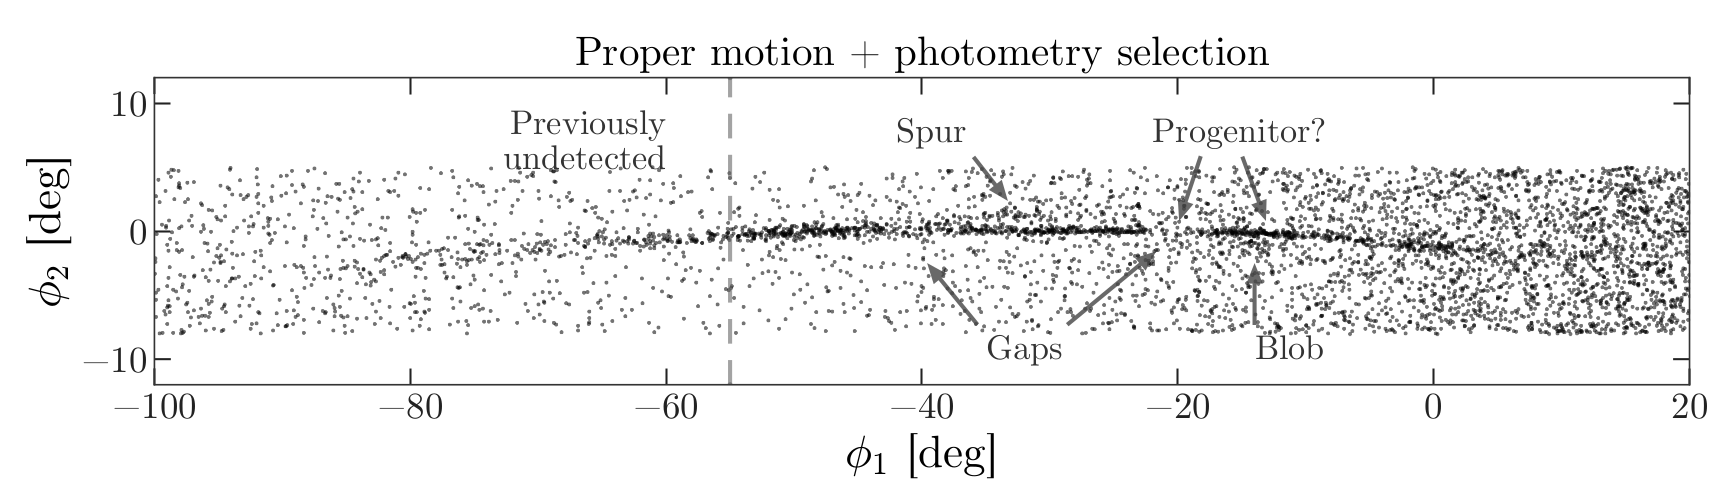


There are some important things to note about this figure:

The axes of this figure are defined so the x-axis is aligned with the stars in GD-1, and the y-axis is perpendicular.

Along the x-axis ($\phi_1$) the figure extends from -100 to 20 degrees. Along the y-axis ($\phi_2$) the figure extends from about -8 to 4 degrees.


For reproducing the figure we would have to select all stars within this rectangle. However, that would be more than 10 million stars, and as an anonymous Gaia user, we are limited to 3 million rows in a single query. In addition to that, while developing and testing code, it will be faster to work with a smaller dataset.

For this reason we will work here with selecting a smaller rectangle that is near the cener of GD-1, runningfrom -55 to -45 degrees $\phi_1$ and from -8 to 4 degrees $\phi_2$.

### Transforming coordinates

In astronomy, we use a variety of different coordinate systems. It thus is a common task to transform between those  between coordinate systems.

In the following example, we will transform from Equatorial coordinates (sky coordinates) to Galactic coordinates and finally to a reference frame defined to more easily study GD-1.


Astropy provides a `SkyCoord` object representing sky coordinates relative to a specified reference frame.

The following example creates a `SkyCoord` object that represents the approximate coordinates of Betelgeuse in the ICRS frame.

ICRS is the “International Celestial Reference System”, adopted in 1997 by the International Astronomical Union.

In [31]:
from astropy.coordinates import SkyCoord

ra = 88.8 * u.degree
dec = 7.4 * u.degree
coord_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')

coord_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (88.8, 7.4)>

In [32]:
coord_galactic = coord_icrs.transform_to('galactic')
coord_galactic

<SkyCoord (Galactic): (l, b) in deg
    (199.79693102, -8.95591653)>

We will continue with transform to and from GD-1 coordinates which are aligned with the GD-1 stream.

To transform to and from GD-1 coordinates, we will use a frame defined by `Gala`, which is an Astropy-affiliated library that provides tools for galactic dynamics.
The documentation of `Gala` can be found here, including how to install the library (which likely will be necessary on your system):
https://gala-astro.readthedocs.io/en/latest/




`Gala` provides `GD1Koposov10`, which is a Heliocentric spherical coordinate system defined by the orbit of the GD-1 stream. In this coordinate system, one axis ($\phi_1$) is defined along the direction of the steam (the x-axis in the Figure above) and the other axis ($\phi_2$) is defined perpendicular to the direction of the stream (the y-axis).

In [33]:
from gala.coordinates import GD1Koposov10

gd1_frame = GD1Koposov10()
gd1_frame

<GD1Koposov10 Frame>

**Exercise:**
    
Find the location of GD-1 in ICRS coordinates.

Hint: Create a SkyCoord object at 0°, 0° in the GD-1 frame. Then transform it to the ICRS frame.



**Solution:**

    




<SkyCoord (ICRS): (ra, dec) in deg
    (200., 59.4504341)>

### Selecting a rectangle

Now that we know how to define coordinate transformations, we are going to use them to select stars that are in GD-1. We are going to start by defining a rectangle that encompasses a small part of GD-1.


The following variables define the boundaries of the rectangle in $\phi_1$ and $\phi_2$:

In [35]:
phi1_min = -55 * u.degree 
phi1_max = -45 * u.degree
phi2_min = -8 * u.degree
phi2_max = 4 * u.degree

To define a rectangle, we write a function that takes the lower and upper bounds as parameters and returns a list of x and y coordinates of the corners of a rectangle starting with the lower left corner and working clockwise.

The return value is a tuple containing a list of coordinates in $\phi_1$ followed by a list of coordinates in $\phi_1$.

In [36]:
def make_rectangle(x1, x2, y1, y2):
    """Return the corners of a rectangle."""
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    return xs, ys

In [37]:
phi1_rect, phi2_rect = make_rectangle(
    phi1_min, phi1_max, phi2_min, phi2_max)

We want to plot our coordinates in the GD-1 frame, but the coordinates in the Gaia catalog are in the ICRS frame. In order to use the rectangle we defined, we need to convert the coordinates from the GD-1 frame to the ICRS frame. We will do this using the `SkyCoord` object which can take lists of coordinates, in addition to single values.

In [38]:
corners = SkyCoord(phi1=phi1_rect, phi2=phi2_rect, frame=gd1_frame)
corners_icrs = corners.transform_to('icrs')


### Defining a polygon

In order to use this rectangle (polygon) as part of an ADQL query, we have to convert it to a string with a comma-separated list of coordinates, as in this example:


In [39]:
"""
POLYGON(143.65, 20.98, 
        134.46, 26.39, 
        140.58, 34.85, 
        150.16, 29.01)
"""


'\nPOLYGON(143.65, 20.98, \n        134.46, 26.39, \n        140.58, 34.85, \n        150.16, 29.01)\n'

`SkyCoord` provides the method `to_string` to produce a list of strings:

In [40]:
corners_list_str = corners_icrs.to_string()
corners_list_str

['146.275 19.2619',
 '135.422 25.8774',
 '141.603 34.3048',
 '152.817 27.1361',
 '146.275 19.2619']

We then proceed with string operations. We can use the Python string function `join` to join `corners_list_str` into a single string (with spaces between the pairs):


In [41]:
corners_single_str = ' '.join(corners_list_str)
corners_single_str

'146.275 19.2619 135.422 25.8774 141.603 34.3048 152.817 27.1361 146.275 19.2619'

We are almost done, but still have to replace the spaces with commas:


In [42]:
corners_single_str.replace(' ', ', ')

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

We can write a function to combine those steps as we will have to do this often:


In [43]:
def skycoord_to_string(skycoord):
    """Convert a one-dimenstional list of SkyCoord to string for Gaia's query format."""
    corners_list_str = skycoord.to_string()
    corners_single_str = ' '.join(corners_list_str)
    return corners_single_str.replace(' ', ', ')

In [44]:
sky_point_list = skycoord_to_string(corners_icrs)
sky_point_list

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

### Assembling the query

Now we are ready to assemble our query to select stars from the Gaia catalog within the small rectangle within GD-1.

We will use the following columns:





In [45]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'


We can insert them into the query we wrote before like this:

In [46]:
query3_base = """SELECT 
TOP 10 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2
"""


Further modifying the query, we add a `WHERE` clause to select stars within the polygon. We also add format specifiers for columns and the polygon:

In [48]:
polygon_top10query_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({sky_point_list}))
"""

We will use `format` to fill in these values.

In [49]:
polygon_top10query = polygon_top10query_base.format(columns=columns, 
                          sky_point_list=sky_point_list)
print(polygon_top10query)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



As always, we should proof-read the query before we send it off.

In [50]:
polygon_top10query_job = Gaia.launch_job_async(polygon_top10query)
print(polygon_top10query_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1703779849760O
Phase: COMPLETED
Owner: None
Output file: async_20231228131049.vot
Results: None


Here are the query results:

In [53]:
polygon_top10query_results = polygon_top10query_job.get_results()
polygon_top10query_results

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354
638285195917112960,142.25452941346344,22.476168171141378,2.6627020143457996,-12.165984395577347,0.4227283465319491
638073505568978688,142.64528557468074,22.16693224953078,18.30674739454163,-7.950659620550862,0.10363972229362585
638086386175786752,142.57739430926034,22.22791951401365,0.9877856720147953,-2.584105480335548,-0.8573270355079308
638049655615392384,142.58913564478618,22.110783166677418,0.24443878227817095,-4.941079187010136,0.099624729200593
638267565075964032,141.81762228999614,22.375696125322275,-3.413174589660796,1.8838892877285924,-0.07271215219283075
638028902333511168,143.18339801317677,22.2512465812369,7.848511762712128,-21.391145547787154,0.28736226011479443
638085767700610432,142.9347319464589,22.46244080823965,-3.6585960944321476,-12.486419770278376,-0.9896728393047383




Finally, we can remove `TOP 10` and run the query again.

The result is larger than our previous queries, so it will take a little longer.

In [54]:
polygon_query_base = """SELECT
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({sky_point_list}))
"""

In [56]:
polygon_query = polygon_query_base.format(columns=columns, 
                          sky_point_list=sky_point_list)
print(polygon_query)

SELECT
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



In [57]:
polygon_job = Gaia.launch_job_async(polygon_query)
print(polygon_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1703779870510O
Phase: COMPLETED
Owner: None
Output file: async_20231228131110.vot
Results: None


We can check the number of stars selected:

In [58]:
polygon_results = polygon_job.get_results()
len(polygon_results)

140339

There are more than 100,000 stars in this polygon, which is a manageable size to work with.

### Saving the results

This is the set of stars we will work with in the next steps. We are going to save the retrieved data, whih is always recommended to not have to repeat the queries when we close the Jupyter notebook.

Astropy Table objects provide `write`, which writes the table to disk.

In [59]:
filename = 'gd1_results.fits'
polygon_results.write(filename, overwrite=True)

We can use `getsize` to confirm that the file exists and check the size which we convert to MB:

In [60]:
from os.path import getsize

MB = 1024 * 1024
getsize(filename) / MB

6.4324951171875

### Summary Section 4

So far, we have composed more complex queries to select stars within a polygonal region of the sky. Then we downloaded the results and saved them in a FITS file.
We have also seen how writing functions can improve our code. 

In the next section, we will reload the data from this file and replicate the next step in the analysis, using proper motion to identify stars likely to be in GD-1.



## 5. Tables and Plots  <a class="anchor" id="fifth-bullet"></a>

     

In the previous section, we wrote a query to select stars from the region of the sky where we expect GD-1 to be, and saved the results in a FITS file.

Now we will read that data back in and implement the next step in the analysis, identifying stars with the proper motion we expect for GD-1.




### Selecting rows and columns

We can get the names of the columns like this:


In [61]:
polygon_results.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

Selecting individual columns can be done with the bracket operator like in the following example:




In [62]:
polygon_results['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


The rows in the Table are numbered from `0` to `n-1`, where `n is the number of rows. We can select the first row:


In [63]:
polygon_results[0]

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354


Notice that the bracket operator can be used to select both columns and rows. You might wonder how it knows which to select. If the expression in brackets is a string, it selects a column; if the expression is an integer, it selects a row.

You can select a column and then an element from the column with applying the bracket operator twice:




In [64]:
polygon_results['ra'][0]

142.48301935991023

This also works with first selecting a row and then an element from the row.

In [65]:
polygon_results[0]['ra']

142.48301935991023

### Scatter plot

To see what the results look like, we will use a scatter plot.
First import `matplotlib.pyplot`:

In [66]:
import matplotlib.pyplot as plt

`pyplot` provides two functions that can make scatter plots:

* `scatter` is more versatile; for example, you can make every point in a scatter plot a different color.
* `plot` is more limited, but can be substantially faster.

As we are plotting more than 100,000 points and they are all the same size and color, we will use `plot`.

We start with making a scatter plot of the stars we selected in the GD-1 region with RA on the x-axis and Dec on the y-axis, both ICRS coordinates in degrees.


The arguments to `plt.plot` are `x`, `y, and a string that specifies the style. In this case, the letters `ko indicate that we want a black, round marker (`k` is for black). The functions `xlabel` and `ylabel` add labels to the axes.



Text(0, 0.5, 'dec (degree ICRS)')

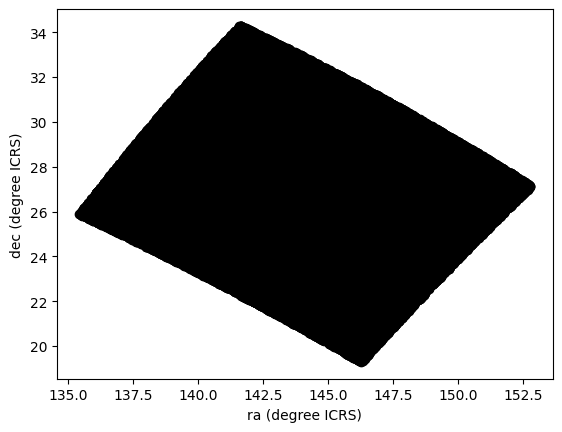

In [67]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

This plot doesn't look much useful...

We can see that the region we selected, which is a rectangle in GD-1 coordinates, is a non-rectanglar region in ICRS coordinates.

However, the plot is "overplotted", which means that the points are overlapping, so we cannot distinguish between high and low density areas.

To fix this, we can provide optional arguments to control the size and opacity of the points.

**Exercise:**

In the functin call to `plt.plot, use the keyword argument `markersize`to adjust the size of the markers.

Then add the keyword argument `alpha` to make the markers partly transparent.

Adjust these arguments until you think the figure shows the data most clearly.



Text(0, 0.5, 'dec (degree ICRS)')

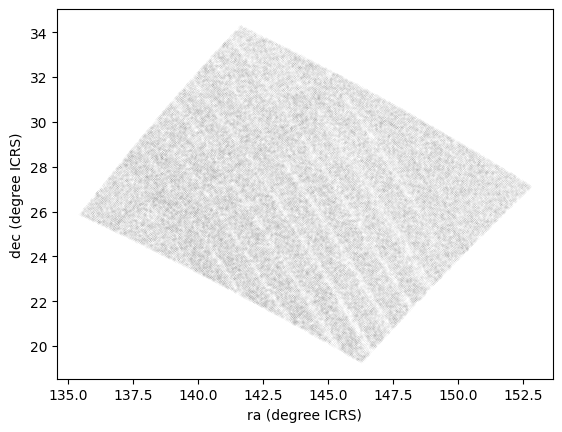

In [68]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

**Note:** In the plot, you might notice stripes with lower density of stars. These stripes are caused by the way Gaia scans the sky. Gaia Data Release 2 covers 22 months of observations where some parts of the sky were visited more often than others.

### Transform back

The data we have selected are within a rectangle of coordinates in the GD-1 frame. We have then transformed them to ICRS when we constructed the query. The coordinates in the query results are in ICRS.

To plot the data, we will transform them back to the GD-1 frame. In that way, the axes of the figure are aligned with the orbit of GD-1, which is useful for two reasons:

* By transforming the coordinates, we can identify stars that are likely to be in GD-1 by selecting stars near the centerline of the stream, where $\phi_2$ is close to 0.

* By transforming the proper motions, we can identify stars with non-zero proper motion along the $\phi_1$ axis, which are likely to be part of GD-1.
 
    
    

The `SkyCoord` object is able to keep proper motions in addition to locations. In that way, we can initialize a `SkyCoord` object with location and proper motions, then use all of these quantities together to transform into the GD-1 frame.

We will now include:
* `pmra` and `pmdec, which are proper motion in the ICRS frame, and

* `distance` and `radial_velocity`, which are important for the reflex correction (correction of the movement of the solar system).

    

In [69]:
distance = 8 * u.kpc
radial_velocity= 0 * u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'],
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec=polygon_results['pmdec'], 
                    distance=distance, 
                    radial_velocity=radial_velocity)


The result is an Astropy `SkyCoord` object, which we can transform to the GD-1 frame.

In [70]:
transformed = skycoord.transform_to(gd1_frame)

### Reflex Correction

The next step is to correct the proper motion measurements for the effect of the motion of our solar system around the Galactic center.

When we created `skycoord`, we provided constant values for `distance` and `radial_velocity` rather than measurements from Gaia.

At first that seems to make no sense, but there is a reason behind doing so:


The stars in GD-1 are so far away that distance estimates from the Gaia parallaxes are unreliable.
    So we replace them with our current best estimate of the mean distance to GD-1, about 8 kpc (see Koposov et al. (2010)).

For the other stars in the table not belonging to GD-1, this distance estimate will be inaccurate, so reflex correction will not be correct. But that should have only a small effect on our ability to identify stars with the proper motion we expect for GD-1.

The measurement of radial velocity has no effect on the correction for proper motion, but we have to provide a value to avoid errors in the reflex correction calculation. So we provide 0 as an arbitrary place-keeper.

With this preparation, we can use `reflex_correct` from `Gala` to correct for the motion of the solar system.

In [71]:
from gala.coordinates import reflex_correct

skycoord_gd1 = reflex_correct(transformed)



The result is a `SkyCoord` object containing:
    
* `phi1` and `phi2`, which represent the transformed coordinates in the GD-1 frame
* `pm_phi1_cosphi2` and `pm_phi2, which represent the transformed proper motions that have been corrected for the motion of the solar system around the Galactic center.

We can plot them:

Text(0, 0.5, '$\\phi_2$ (degree GD1)')

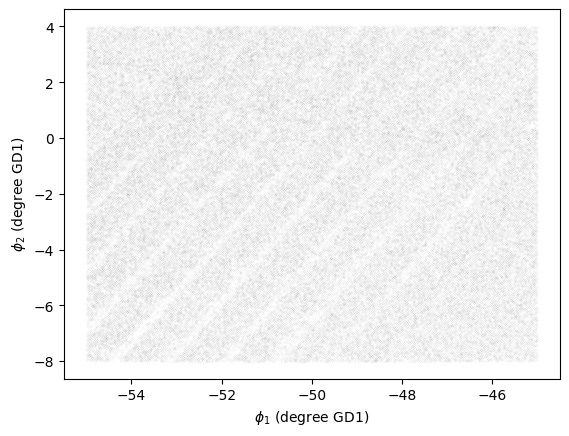

In [72]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('$\phi_1$ (degree GD1)')
plt.ylabel('$\phi_2$ (degree GD1)')

This scatter plot of `phi1` versus `phi2` in GD-1 coordinates shows the selected region is rectangular as intended.

Now we can extract the columns we want from `skycoord_gd1` and add them as columns in the Astropy Table `polygon_results`.

In [74]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                    Right ascension       Column
     phi2 float


The variables `pm_phi1_cosphi2` and `pm_phi2` contain the components of proper motion in the transformed frame.

In [75]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                    Right ascension       Column
     phi2 float

For tables, two common choices are the Pandas DataFrame and Astropy Table. Both Pandas DataFrames and Astropy Tables share many of the same characteristics and most of the manipulations that we do can be done with either.

Astropy makes it easy to convert between the two data types so using both is easy. Here we will use Pandas DataFrame, as Pandas is a general-purpose tool.

However, compared to Astropy Table, Pandas has one big drawback: it does not keep the metadata associated with the table, including the units for the columns.

We convert the Astropy Table to a Pandas DataFrame.

In [76]:
import pandas as pd

results_df = polygon_results.to_pandas()

DataFrame provides `shape`, which shows the number of rows and columns:



In [77]:
results_df.shape

(140339, 10)

It also provides `head`, which displays the first few rows. This method is is useful for providing a quick look at tables.




In [78]:
results_df.head()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,-54.627448,-3.542738,1.466103,-0.185292


Before we continue, we will put all the previous steps into a single function to which we provide the coordinates and proper motion that we get as an Astropy Table from our Gaia query, add columns representing the reflex corrected GD-1 coordinates and proper motions, and transform it into a Pandas DataFrame.

In [79]:
def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.
    
    table: Astropy Table
    
    returns: Pandas DataFrame
    """
    #Create a SkyCoord object with the coordinates and proper motions
    # in the input table
    skycoord = SkyCoord(
               ra=table['ra'], 
               dec=table['dec'],
               pm_ra_cosdec=table['pmra'],
               pm_dec=table['pmdec'], 
               distance=8*u.kpc, 
               radial_velocity=0*u.km/u.s)

    # Define the GD-1 reference frame
    gd1_frame = GD1Koposov10()

    # Transform input coordinates to the GD-1 reference frame
    transformed = skycoord.transform_to(gd1_frame)

    # Correct GD-1 coordinates for solar system motion around galactic center
    skycoord_gd1 = reflex_correct(transformed)

    #Add GD-1 reference frame columns for coordinates and proper motions
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    # Create DataFrame
    df = table.to_pandas()

    return df

In [80]:
results_df = make_dataframe(polygon_results)


We chose HDF5 which is a binary format, which provides files that are small and fast to read and write (like FITS, but unlike for example XML).

An HDF5 file is similar to a multi-extension FITS file in the sense that it can contain more than one table. In HDF5 vocabulary, a table is called a Dataset. Also similar to FITS, HDF5 stores the metadata associated with the table, including column names, row labels, and data types (like FITS).


For executing the following code, it might be necessary to first install `tables`.
    



In [72]:
#pip3 install tables

filename = 'gd1_data.hdf'

results_df.to_hdf(filename, 'results_df', mode='w')


As HDF5 files can contain more than one Dataset, a key has to provided to identify the Dataset in the file.

By default, writing a DataFrame appends a new dataset to an existing HDF5 file. We will use the argument `mode='w'` to overwrite the file if it already exists rather than append another dataset to it.

### Summary Section 5

In this section, we loaded the Gaia data we previously saved from the query.

We transformed the coordinates and proper motions from the ICRS frame, as provided by Gaia, to a frame aligned with the orbit of GD-1. We stored the results in a Pandas DataFrame, and visualized them. While doing so we saw that adjusting the marker size and opacity is important.

We then combined all of these steps into a function.

Finally, we saved our results to an HDF5 file. This enables us to restart the analysis from this stage or verify our results at some future time.


## 6. Improving the Plots  <a class="anchor" id="sixth-bullet"></a>

So far, we used a query to select stars from the region of the sky where we expect GD-1 to be, and saved the results in a FITS and HDF5 file. We also made a basic plot.

Building on this, we now read in that data and continue with our analysis by identifying stars with the proper motion we expect for GD-1.


### Exploring data

One benefit of using Pandas is that it provides functions for exploring the data and checking for problems. One of the most useful of these functions is `describe`, which computes summary statistics for each column.

In [73]:
results_df.describe()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,6.792399e+17,143.823122,26.780285,-2.484404,-6.100777,0.179492,-50.091158,-1.803301,-0.868963,1.409208
std,3.792177e+16,3.697850,3.052592,5.913939,7.202047,0.759590,2.892344,3.444398,6.657714,6.518615
min,6.214900e+17,135.425699,19.286617,-106.755260,-138.065163,-15.287602,-54.999989,-8.029159,-115.275637,-161.150142
25%,6.443517e+17,140.967966,24.592490,-5.038789,-8.341561,-0.035981,-52.602952,-4.750426,-2.948723,-1.107128
50%,6.888060e+17,143.734409,26.746261,-1.834943,-4.689596,0.362708,-50.147362,-1.671502,0.585037,1.987149
75%,6.976579e+17,146.607350,28.990500,0.452893,-1.937809,0.657637,-47.593279,1.160514,3.001768,4.628965
max,7.974418e+17,152.777393,34.285481,104.319923,20.981070,0.999957,-44.999985,4.014609,39.802471,79.275199


**Exercise:**
    

Review the summary statistics in this table.

Do you think the values make sense in this scientific context?
Do you identify any values that seem problematic, or evidence of other data issues?



**Solution:**




### Plot proper motion

Now we are ready to replicate one of the panels in Figure 1 of the Price-Whelan and Bonaca paper, the one that shows components of proper motion as a scatter plot:


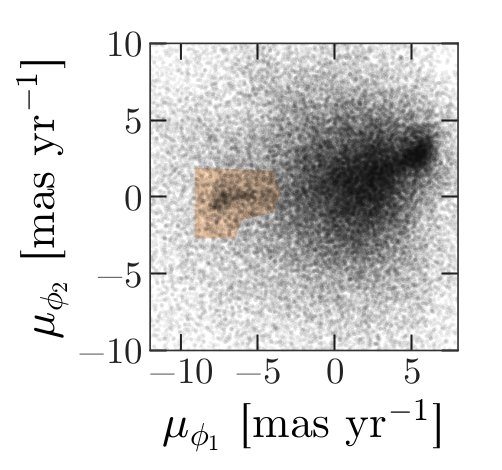

Scatter of proper motion phi1 versus phi2 showing overdensity in negative proper motions of GD-1 stars.

In this figure, the shaded area identifies stars that are likely to be in GD-1 because:

    Due to the nature of tidal streams, we expect the proper motion for stars in GD-1 to be along the axis of the stream; that is, we expect motion in the direction of phi2 to be near 0.

    In the direction of phi1, we do not have a prior expectation for proper motion, except that it should form a cluster at a non-zero value.

By plotting proper motion in the GD-1 frame, we hope to find this cluster. Then we will use the bounds of the cluster to select stars that are more likely to be in GD-1.

The following figure is a scatter plot of proper motion, in the GD-1 frame, for the stars in results_df.

Text(0, 0.5, 'Proper motion phi2 (mas/yr GD1 frame)')

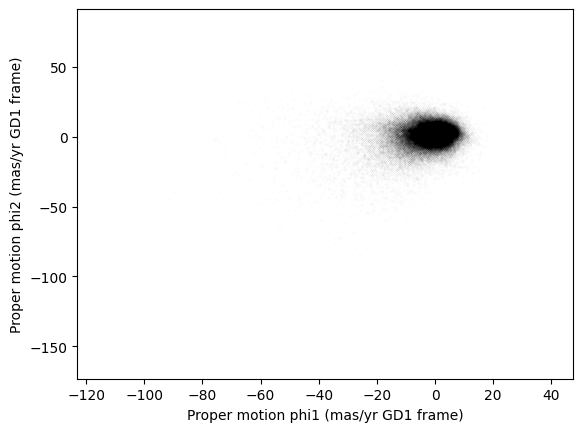

In [74]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)
    
plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

Scatter plot of proper motion in GD-1 frame of selected stars showing most are near the origin.

Most of the proper motions are near the origin, but there are a few extreme values. Following the example in the paper, we will use `xlim` and `ylim` to zoom in on the region near the origin.

(-10.0, 10.0)

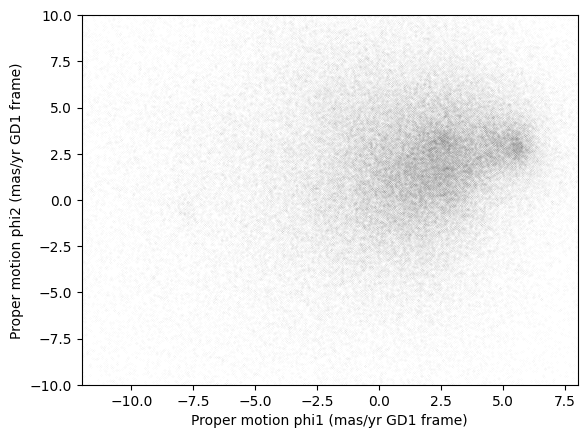

In [75]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)
    
plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

There is a slight overdensity near (-7.5, 0). 
To see the cluster more clearly, we need a sample that contains a higher proportion of stars in GD-1. We will do that by selecting stars close to the centerline.

### Selecting the centerline

As we can see in the following figure, many stars in GD-1 are less than 1 degree from the line $\phi_2=0$.

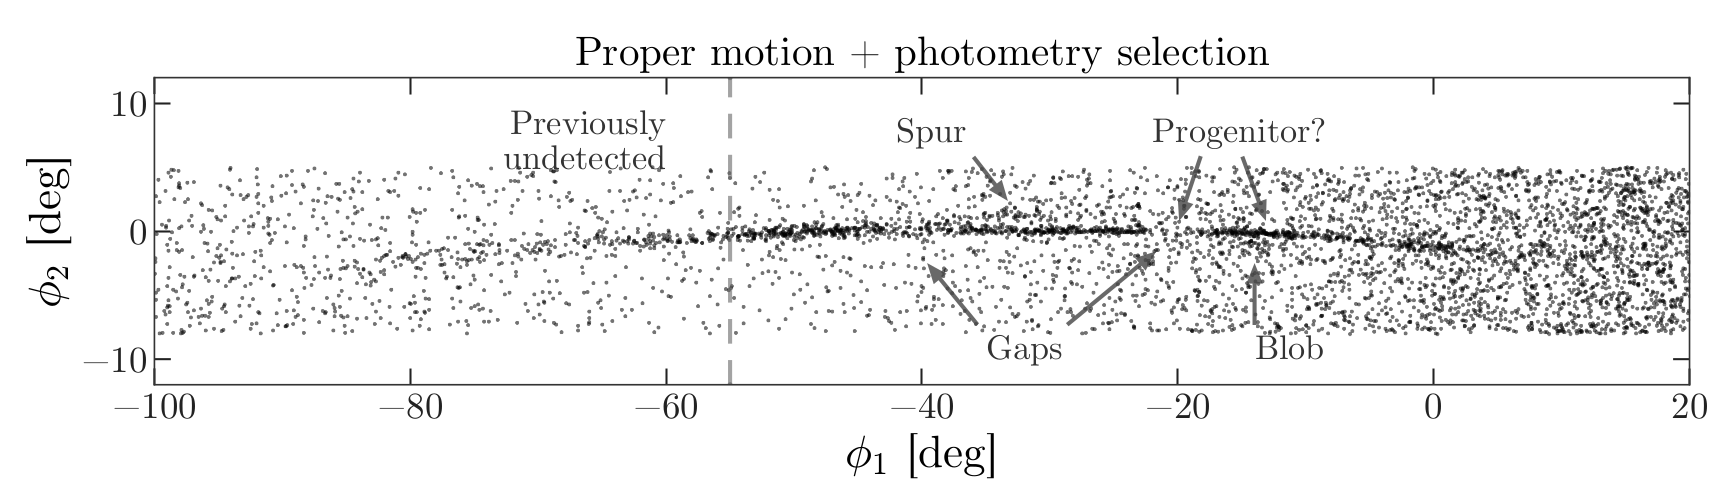

Stars near this line have the highest probability of being in GD-1.

To select them, we will use a “Boolean mask”. We will start by selecting the `phi2` column from the DataFrame:


In [76]:
phi2 = results_df['phi2']
type(phi2)

pandas.core.series.Series



The result is a `Series`, which is the structure Pandas uses to represent columns.

We can use a comparison operator, >, to build a mask by comparing the values in a `Series` to a constant.




In [77]:
phi2_min = -1.0 * u.degree
phi2_max = 1.0 * u.degree

mask = (phi2 > phi2_min)
type(mask)

pandas.core.series.Series

The result is a `Series` of Boolean values, that is, `True` and `False`:


In [78]:
mask.head()


0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

To select values that fall between `phi2_min` and `phi2_max`, we will use the `&` operator, which computes logical AND. The result is true where elements from both Boolean Series are true.

In [79]:
mask = (phi2 > phi2_min) & (phi2 < phi2_max)

The sum of a Boolean Series is the number of `True` values, so we can use sum to see how many stars are in the selected region.

In [80]:

mask.sum()

25084

With that, we can mask out some of the rows in a `DataFrame` and select the remaining ones:


In [81]:
centerline_df = results_df[mask]
type(centerline_df)

pandas.core.frame.DataFrame

`centerline_df` is a `DataFrame` that contains only the rows from results_df that correspond to `True` values in mask. So it contains the stars near the centerline of GD-1.

We can use `len` to see how many rows are in `centerline_df`:




In [82]:
len(centerline_df)

25084

We can also check to which fraction of rows that corresponds:
    



In [83]:

len(centerline_df) / len(results_df)

0.1787386257562046

This tells us that there are about 25,000 stars in this region, about 18% of the total.

We continue now with writing a function for plotting proper motion:

In [85]:
def plot_proper_motion(df):
    """Plot proper motion.
    
    df: DataFrame with `pm_phi1` and `pm_phi2`
    """
    x = df['pm_phi1']
    y = df['pm_phi2']
    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('Proper motion phi1 (mas/yr)')
    plt.ylabel('Proper motion phi2 (mas/yr)')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

    



We call the function:


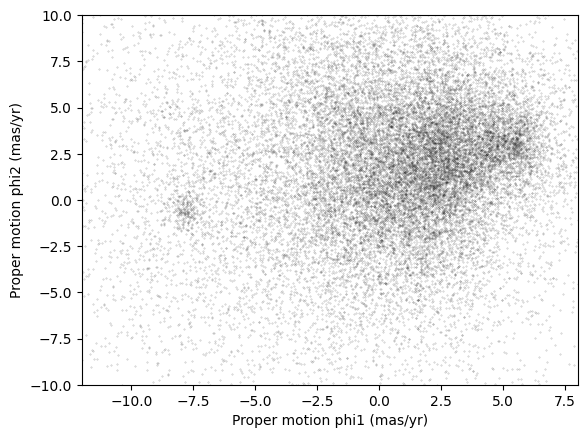

In [86]:
plot_proper_motion(centerline_df)

From that, the cluster near (-7.5, 0) is easier to see.

You might notice that our figure is less dense than the one in the paper. The reason is that we started with a set of stars from a relatively small region, whereas the figure in the paper is based on a region about 10 times bigger.

### Filtering based on proper motion

The next step is to select stars in the overdense region of proper motion, which are candidates to be in GD-1.

In the original paper, they used a polygon to cover this region.
We will use a simple rectangle for now, but in a later lesson we will see how to select a polygonal region as well.

Here are bounds on proper motion we chose by eye:


In [87]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

We will draw these bounds by making use of the `make_rectangle` function we wrote previously.


In [88]:

pm1_rect, pm2_rect = make_rectangle(
    pm1_min, pm1_max, pm2_min, pm2_max)


Here is what the plot looks like with the bounds we chose:


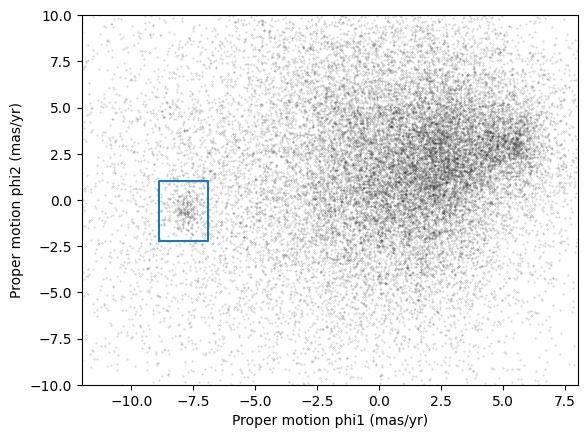

In [89]:
plot_proper_motion(centerline_df)
plt.plot(pm1_rect, pm2_rect, '-')

Now that we have identified the bounds of the cluster in proper motion, we will use it to select rows from `results_df`.

We will use the following function, which uses Pandas operators to make a mask that selects rows where series falls between low and high.




In [90]:

def between(series, low, high):
    """Check whether values are between `low` and `high`."""
    return (series > low) & (series < high)

The mask selects stars with proper motion in the region we chose:

In [91]:
pm1 = results_df['pm_phi1']
pm2 = results_df['pm_phi2']

pm_mask = (between(pm1, pm1_min, pm1_max) & 
           between(pm2, pm2_min, pm2_max))


Again, the sum of a Boolean series is the number of `TRUE` values.


In [92]:
pm_mask.sum()

1049

In [93]:
selected_df = results_df[pm_mask]
len(selected_df)

1049


These are the stars likely to be in GD-1. We can inspect these stars and plot their coordinates:

In [86]:

x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('$\phi_1$ (degree GD1)')
plt.ylabel('$\phi_2$ (degree GD1)')

NameError: name 'selected_df' is not defined

This gives us a scatter plot of coordinates of stars in selected region, clearly showing the tidal stream.

To clean up the plot we can add two new Matplotlib commands:
* `axis` with the parameter `equal` sets up the axes so a unit is the same size along the x and y axes.
* `title` puts the input string as a title at the top of the plot. The `fontsize` keyword sets the fontsize to be medium, which is a little smaller than the default large.

In an example like this, where x and y represent coordinates in space, equal axes ensures that the distance between points is represented accurately. Since we are now constraining the relative proportions of our axes, the data may not fill the entire figure.

(-55.4928032130903, -44.503699550734694, -8.606246809552179, 4.601299340488258)

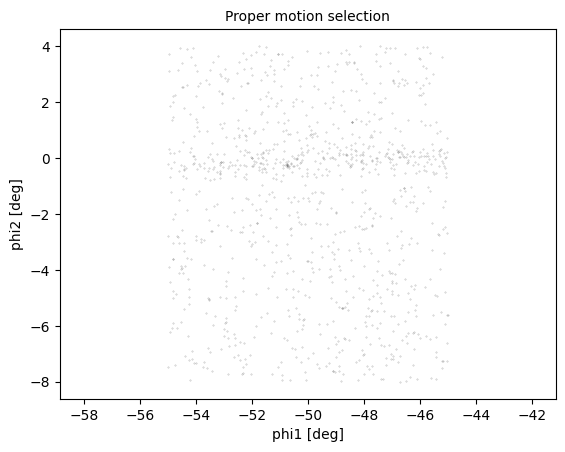

In [95]:
x = selected_df['phi1']
y = selected_df['phi2']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('$\phi_1$ [deg]')
plt.ylabel('$\phi_2$ [deg]')
plt.title('Proper motion selection', fontsize='medium')

plt.axis('equal')

### Summary Section 6

In this section, we re-loaded the transformed Gaia data we saved from a previous query.

We made a scatter plot from stars selected near the centerline of GD-1.

We used a Boolean Series as a mask to select stars whose proper motion is in that region.



## Summary <a class="anchor" id="seventh-bullet"></a>

In this lesson, we applied what we have learnt in previous lessons to a data set from Gaia.
We have retrieved data by using a ADQL query and then performed various steps of data processing including coordinate transformations. We made plots and improved them for readability.

By now, this Python course should have prepared you to work with astronomical data sets in various ways, and to apply your knowledge to tackle a range of research questions. In addition, what you have learnt should enable you to generate meaningful and readable plots for such as presentations, posters and papers.

